In [142]:
# 도미, 빙어 순서 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [143]:
import numpy as np


In [144]:
from sklearn.model_selection import train_test_split

In [145]:
# 2차원 넘파이(numpy) 배열
fish_data=np.column_stack([fish_length,fish_weight])
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [146]:
# 도미는 1 , 빙어는 0
fish_target = np.concatenate([np.ones(35),np.zeros(14)]) # 도미 35, 빙어 14
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [147]:
# <훈련세트(train) , 테스트 세트(test) 나누기>

train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target)

In [148]:
# k회귀 근접 모델
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input,train_target) #훈련세트 (train) 학습


KNeighborsClassifier()

In [149]:
kn.score(test_input,test_target) # 테스트 세트(test) 테스트 결과 100점 = 완벽 학습

1.0

In [150]:
kn.predict([[25,150]]) # 1(도미) 가 나와야하는데  0(빙어) 나옴

array([0.])

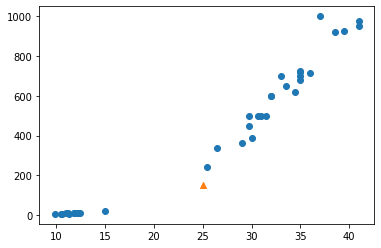

In [151]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.show()


In [152]:
# 가장 가까운 5개의 거리와 인덱스 값을 알수 있음.
distances, indexes = kn.kneighbors([[25,150]])
print(distances,indexes)

[[ 92.00086956 130.48375378 137.17988191 138.39320793 140.62090883]] [[20  0  1  9 26]]


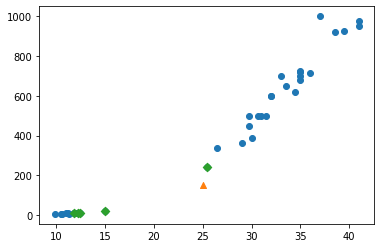

In [153]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.show()

In [154]:
# 빙어 2마리 , 도미 3마리 다수결로 도미(0)로 결정
# x 5단위 y 100단위 => 컴퓨터가 무게(y) 데이터를 더 중요하게 생각함
# 표준 점수로 하기 = (값 - 값의 평균)/ 값의 표준편차 => 평균 0 표준편차1 인 데이터
# <데이터 표준화>
mean = np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)

In [155]:
train_scaled = (train_input - mean)/ std
test_scaled = (test_input - mean) /std

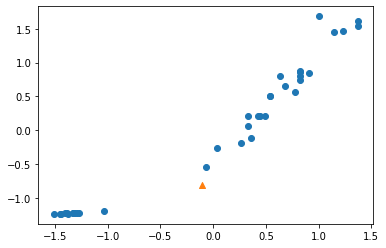

In [156]:
new = ([25,150]-mean) /std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.show()

In [157]:
# x,y 축 평등하게 볼수 있음

kn=KNeighborsClassifier()
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [158]:
kn.score(test_scaled,test_target)

1.0

In [159]:
kn.predict([new])

array([1.])

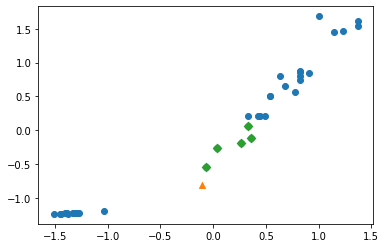

In [160]:
# 도미 예측 완료!
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.show()